# Seguridad Vial

In [1]:
import pandas as pd
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import geopandas as gpd

In [5]:
import contextily as cx

In [6]:
from pyproj import Proj, transform

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option('display.max_columns', None)

## Cargando datos

In [109]:
biobio = pd.read_csv('data/external/siniestros_individuales_conaset/individuales_biobio_2020.csv')

In [110]:
biobio.head(5)

,X,Y,FID,COD_REG,REGION,CUT,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,LAT,LNG,VAL_COM,TIPO,Año,Idaccident,Fecha,Tipo_Accid,Tipo__CONA,Zona,Causa__CON,Causa,Fallecidos,Graves,Menos_Grav,Leves,Hora
0,-73.003060,-36.833575,1,8,REGION BIO BIO,8101,CONCEPCION,LOS TILOS,,27,"Los Tilos 27, Concepción, Bío Bío, Chile",-36.833575,-73.003060,1,RANGE_INTERPOLATED,2020,1291168,2020/07/26 00:00:00+00,CHOQUE,CHOQUE,URBANA,IMPRUDENCIA DEL CONDUCTOR,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,0,0,0,0,22:30:00
1,-73.091344,-36.781466,2,8,REGION BIO BIO,8110,TALCAHUANO,LAS GOLONDRINAS,,384,"Av. Las Golondrinas 384, Talcahuano, Bío Bío, ...",-36.781466,-73.091344,1,RANGE_INTERPOLATED,2020,1291364,2020/07/13 00:00:00+00,COLISION LATERAL,COLISION,URBANA,IMPRUDENCIA DEL CONDUCTOR,VIRAJES INDEBIDOS,0,0,0,1,21:00:00
2,-73.097084,-36.794475,3,8,REGION BIO BIO,8112,HUALPEN,RECONQUISTA,CARTAGENA,0,"Cartagena & La Reconquista, Hualpén, Bío Bío, ...",-36.794475,-73.097084,1,GEOMETRIC_CENTER,2020,1291661,2020/07/24 00:00:00+00,CHOQUE,CHOQUE,URBANA,IMPRUDENCIA DEL CONDUCTOR,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,0,0,0,0,14:30:00
3,-73.048714,-36.823594,4,8,REGION BIO BIO,8101,CONCEPCION,CASTELLON,,681,"Castellón 681, Concepción, Bío Bío, Chile",-36.823594,-73.048714,1,RANGE_INTERPOLATED,2020,1291765,2020/07/29 00:00:00+00,COLISION LATERAL,COLISION,URBANA,PERDIDA CONTROL VEHICULO,PERDIDA CONTROL VEHICULO,0,0,0,1,09:25:00
4,-73.053147,-36.823899,5,8,REGION BIO BIO,8101,CONCEPCION,CAUPOLICAN,LOS CARRERA,0,"Avenida los Carrera & Caupolicán, Concepción, ...",-36.823899,-73.053147,1,GEOMETRIC_CENTER,2020,1291778,2020/07/30 00:00:00+00,ATROPELLO,ATROPELLO,URBANA,IMPRUDENCIA DEL CONDUCTOR,NO RESPETAR DERECHO PREFERENTE DE PASO A PEATON,0,1,0,0,16:00:00


In [16]:
df = pd.read_csv('data/external/siniestros_individuales_conaset/individuales_rm_2020.csv')

Seleccionando variables

In [111]:
biobio = biobio[['LNG','LAT','FID','Fecha','Hora','CALLE_UNO','CALLE_DOS', 'NUMERO', 'COMUNA', 'COD_REG']]

In [18]:
df = df[['LNG','LAT','FID','Fecha','Hora','CALLE_UNO','CALLE_DOS', 'NUMERO', 'COMUNA', 'COD_REG']]

Creando variables nuevas

In [112]:
biobio.rename(columns = {'LNG':'Longitude', 'LAT':'Latitude'}, inplace = True)

In [19]:
df.rename(columns = {'LNG':'Longitude', 'LAT':'Latitude'}, inplace = True)

Longitud y latitud

In [113]:
biobio['Longitude'], biobio['Latitude'] = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), biobio.Longitude, biobio.Latitude)  # longitude first, latitude second.

In [20]:
df['Longitude'], df['Latitude'] = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), df.Longitude, df.Latitude)  # longitude first, latitude second.

In [115]:
biobio_geo = gpd.GeoDataFrame(biobio, geometry=gpd.points_from_xy(biobio.Longitude, biobio.Latitude, crs = "EPSG:3857"))

In [21]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude, crs = "EPSG:3857"))

## Mapa de Chile

In [22]:
chile = gpd.read_file('data/internal/comunas/comunas.shp')

In [23]:
chile.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Graficos

## Mapas

In [24]:
df_wm = chile[(chile['codregion']==8) & (chile['Comuna'].isin(['TALCAHUANO','CONCEPCION']))]

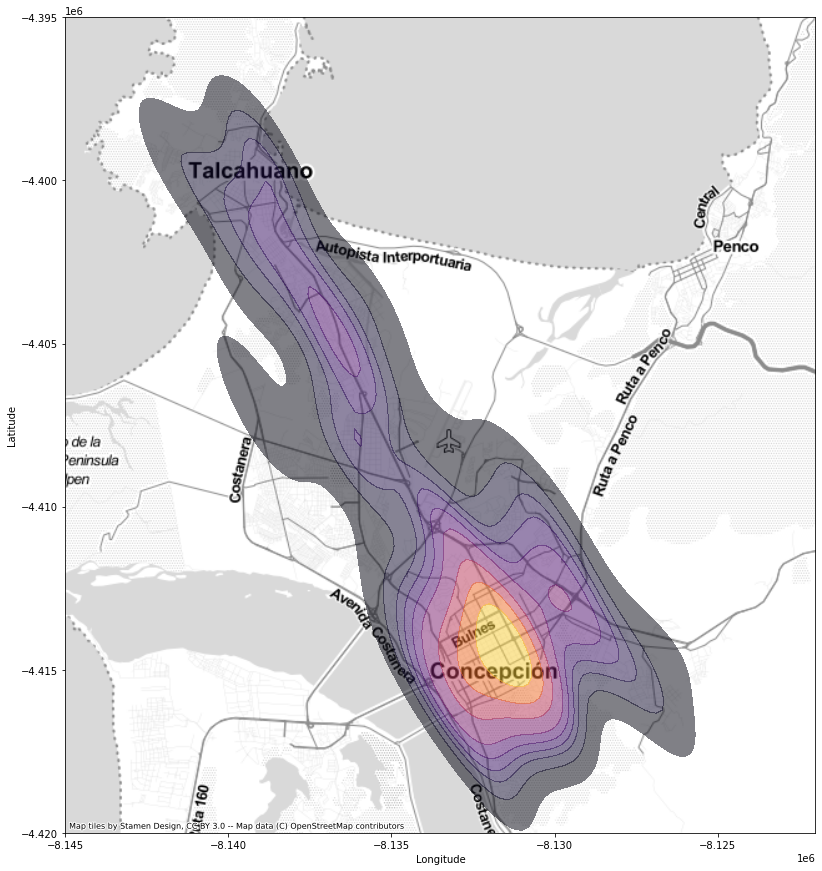

In [124]:
df_wm = chile[(chile['Comuna'].isin(['Concepción','Talcahuano']))]

ax = df_wm.plot(figsize=(15, 15), alpha=0, edgecolor='k')

sns.histplot(
    x = 'Longitude', 
    y = 'Latitude',
    element = 'poly',
    fill = True,
    bins = 100, 
    kde = True,
    alpha = 0.5,
    cmap = 'inferno',
    ax = ax,
    data = biobio[biobio['COMUNA'].isin(['TALCAHUANO','CONCEPCION'])] 
)


cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

#ax.set_axis_off()

ax.set_ylim([-4.42E6,-4.395E6])
ax.set_xlim([-8.145E6,-8.122E6])

plt.savefig('concepcion.jpg')

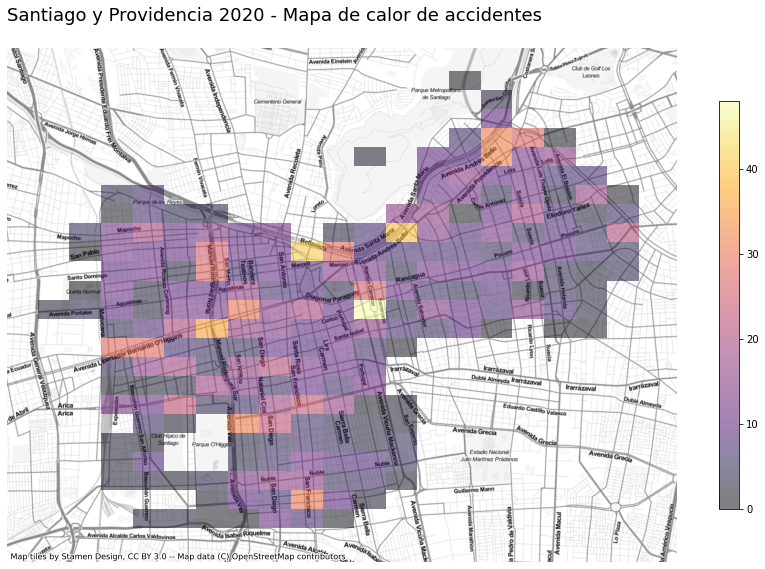

In [108]:
df_wm = chile[(chile['Comuna'].isin(['Santiago','Providencia']))]

ax = df_wm.plot(figsize=(15, 15), alpha=0, edgecolor='k')

sns.histplot(
    x = 'Longitude', 
    y = 'Latitude',
    element = 'poly',
    fill = True,
    kde = True,
    alpha = 0.5,
    cmap = 'inferno',
    cbar=True,
    cbar_kws=dict(shrink=.5),
    ax = ax,
    data = df[df['COMUNA'].isin(['SANTIAGO','PROVIDENCIA'])] 
)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

ax.set_axis_off()

#ax.set_ylim([-3.954E6,-3.944E6])
#ax.set_xlim([-7.861E6,-7.8475E6])

ax.set_title('Santiago y Providencia 2020 - Mapa de calor de accidentes\n', loc = 'left', fontsize = 18)


plt.savefig('Santiago Providencia.jpg')